In [1]:
%load_ext autoreload
%autoreload 2
import os, sys, re, io
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('default')
# style.use('fivethirtyeight')

from core.fileop import DirCheck, ListFiles
from core.filamentanalysis import SegStats, BranchLabel


In [2]:
ippath = '/Volumes/LaCie_DataStorage/Woo-lungs/2019/data/normoxia/'
var = ['df_nodes', 'df_points', 'df_segments']
fl_names = ['lung_vs_002_nodes.csv', 'lung_vs_002_points.csv', 'lung_vs_002_segments.csv']

for idx in range(len(fl_names)):
    exec("%s = pd.read_csv(os.path.join(ippath, '%s'))"%(var[idx], fl_names[idx]))


In [3]:
# calculate length for each segments
filelist = ListFiles(ippath, extension='.csv')[0]
filelist = [filename + '.csv' for filename in filelist]
print(filelist)


['lung_vs_002_nodes.csv', 'lung_vs_002_points.csv', 'lung_vs_002_segments.csv', 'lung_vs_002_segments_s.csv']


In [4]:
opfilename = 'lung_vs_002_segments_s.csv'
if opfilename in filelist:
    df_segments_s = pd.read_csv(os.path.join(ippath, opfilename), header = 0)
else:
    df_segments_s = SegStats(df_points, df_segments)            
    df_segments_s.to_csv(os.path.join(ippath, opfilename), index = False)


In [5]:
display(df_segments_s)


,Segment ID,Identified_Loops,Identified_Graphs,Node ID #1,Node ID #2,Point IDs,length,thickness
0,0,0,1,0,1,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...",366.171080,22.130303
1,1,0,1,2,3,"31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,4...",390.670970,21.747900
2,2,0,1,4,5,"65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,8...",241.125521,35.057290
3,3,0,1,6,7,"85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,1...",204.416305,22.143382
4,4,0,1,8,9,"102,103,104,105,106,107,108,109,110,111,112",130.995876,22.429027
5,5,0,1,10,11,"113,114,115,116,117,118",74.606917,31.010733
6,6,0,1,12,13,"119,120,121,122,123,124,125,126,127,128,129,13...",299.537555,20.847270
7,7,0,1,14,15,"142,143,144,145,146,147,148,149,150,151,152,15...",167.531731,23.973171
8,8,0,1,16,17,"156,157,158,159,160,161,162,163,164,165,166,16...",276.841942,29.681492
9,9,0,1,18,1,"180,181,182,183,184,185,186,187,188,189,190,19...",220.615785,20.001424


In [6]:
def binminmax(data, binsize = 100, bin_min = 0):
    val_max = np.max(data)
    bin_max = np.ceil(val_max/binsize) * binsize
    bins = np.linspace(bin_min, bin_max, binsize)
    return bins


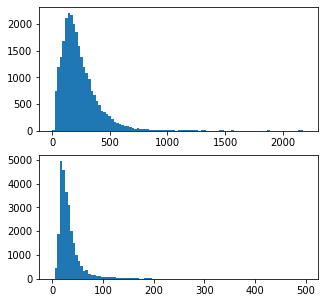

In [7]:
plt.figure(figsize=(5, 5))
ax1 = plt.subplot(211)
ax1 = plt.hist(df_segments_s['length'], bins = binminmax(df_segments_s['length']))
ax2 = plt.subplot(212)
ax1 = plt.hist(df_segments_s['thickness'], bins = binminmax(df_segments_s['thickness']))
plt.show()


In [8]:
display(df_nodes)
display(df_segments)



,Node ID,Identified_Graphs,X Coord,Y Coord,Z Coord,Coordination Number
0,0,1,10608.20,8083.40,0.0000,1
1,1,1,10722.50,8093.79,311.7010,3
2,2,1,10275.70,7096.35,72.7301,1
3,3,1,10442.00,7252.20,311.7010,3
4,4,1,10784.80,8582.12,176.6300,1
5,5,1,10784.80,8457.44,353.2610,3
6,6,1,10026.40,6535.29,207.8000,1
7,7,1,10036.70,6649.58,374.0410,3
8,8,1,10618.60,9371.75,207.8000,1
9,9,1,10618.60,9257.46,259.7510,3


,Segment ID,Identified_Loops,Identified_Graphs,Node ID #1,Node ID #2,Point IDs
0,0,0,1,0,1,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18..."
1,1,0,1,2,3,"31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,4..."
2,2,0,1,4,5,"65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,8..."
3,3,0,1,6,7,"85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,1..."
4,4,0,1,8,9,"102,103,104,105,106,107,108,109,110,111,112"
5,5,0,1,10,11,"113,114,115,116,117,118"
6,6,0,1,12,13,"119,120,121,122,123,124,125,126,127,128,129,13..."
7,7,0,1,14,15,"142,143,144,145,146,147,148,149,150,151,152,15..."
8,8,0,1,16,17,"156,157,158,159,160,161,162,163,164,165,166,16..."
9,9,0,1,18,1,"180,181,182,183,184,185,186,187,188,189,190,19..."


In [9]:
display(df_nodes.iloc[23966, 0])

23966

In [10]:
print(df_nodes.loc[df_nodes['Node ID'] == 471, 'Node ID'].item())

471


In [11]:
# characterize branch connection
ls_done, branch_lvl = BranchLabel(df_nodes, df_segments)

BranchLabel:   0%|          | 0/24930 [00:00<?, ?it/s]

Node ID                  int64
Identified_Graphs        int64
X Coord                float64
Y Coord                float64
Z Coord                float64
Coordination Number      int64
dtype: object
Segment ID            int64
Identified_Loops      int64
Identified_Graphs     int64
Node ID #1            int64
Node ID #2            int64
Point IDs            object
dtype: object


Node ID                    0.0
Identified_Graphs          1.0
X Coord                10608.2
Y Coord                 8083.4
Z Coord                    0.0
Coordination Number        1.0
Name: 0, dtype: float64

level: 0
parents:[0]
0
0
level: 1
parents:[1]
1
1
level: 2
parents:[49]
49
49
level: 3
parents:[56]
56
56
level: 4
parents:[117]
117
117
level: 5
parents:[151]
151
151
level: 6
parents:[187]
187
187
level: 7
parents:[235, 260]
235
235
260
260
level: 8
parents:[247, 335]
247
247
335
335
level: 9
parents:[269, 324]
269
269
324
324
level: 10
parents:[354, 439]
354
354
439
439
level: 11
parents:[377, 423, 488]
377
377
423
423
488
488
level: 12
parents:[471, 408, 510]
471
471
408
408
510
510
level: 13
parents:[570, 472, 599, 600]
570
570
472
472
599
599
600
600
level: 14
parents:[756, 663, 627, 658, 627, 628]
756
756
663
663
627
627
658
658
627
627
628
628
level: 15
parents:[771, 772, 1102, 668, 755, 771]
771
771
772
772
1102
1102
668
668
755
755
771
771
level: 16
parents:[807, 555, 773, 1258, 701, 806]
807
807
555
555
773
773
1258
1258
701
701
806
806
level: 17
parents:[1377, 1378, 820, 838, 1014, 1299, 1352, 754, 790, 742, 1053]
1377
1377
1378
1378
820
820
838
838
1014
1014
1299
1299
1352

6096
6096
5657
5657
6445
6445
5575
5575
6364
6364
6364
6364
6033
6033
6008
6008
6333
6333
6284
6284
6306
6306
4304
4304
4328
4328
4707
4707
4773
4773
level: 39
parents:[5342, 5750, 6138, 6139, 5384, 5385, 5603, 6006, 6098, 6032, 6196, 6282, 6281, 6282, 6546, 6522, 6485, 6486, 6375, 6544, 5024, 4873]
5342
5342
5750
5750
6138
6138
6139
6139
5384
5384
5385
5385
5603
5603
6006
6006
6098
6098
6032
6032
6196
6196
6282
6282
6281
6281
6282
6282
6546
6546
6522
6522
6485
6485
6486
6486
6375
6375
6544
6544
5024
5024
4873
4873
level: 40
parents:[5533, 6466, 6518, 6623, 5291, 6260, 6214, 6511, 6699, 6844, 6845, 7112, 6491, 6547, 4855, 4961]
5533
5533
6466
6466
6518
6518
6623
6623
5291
5291
6260
6260
6214
6214
6511
6511
6699
6699
6844
6844
6845
6845
7112
7112
6491
6491
6547
6547
4855
4855
4961
4961
level: 41
parents:[5780, 5894, 6960, 6961, 5511, 6331, 6332, 6787, 6788, 6961, 6962, 7064, 7332, 6520, 4995]
5780
5780
5894
5894
6960
6960
6961
6961
5511
5511
6331
6331
6332
6332
6787
6787
6788
6788
6961


23545
23545
level: 82
parents:[24402, 24425, 24426, 24556, 24578, 24394, 24462, 24682, 24761, 24762, 24451, 24452, 24538, 23549, 23569, 23768, 23769]
24402
24402
24425
24425
24426
24426
24556
24556
24578
24578
24394
24394
24462
24462
24682
24682
24761
24761
24762
24762
24451
24451
24452
24452
24538
24538
23549
23549
23569
23569
23768
23768
23769
23769
level: 83
parents:[24419, 24436, 24532, 24533, 24610, 24649, 24662, 24470, 24719, 24820, 24821, 24527, 23571, 23766, 23922]
24419
24419
24436
24436
24532
24532
24533
24533
24610
24610
24649
24649
24662
24662
24470
24470
24719
24719
24820
24820
24821
24821
24527
24527
23571
23571
23766
23766
23922
23922
level: 84
parents:[24458, 24574, 24588, 24547, 24622, 24671, 24741, 24742, 24579, 24580, 24750, 24843, 24568, 23644, 23793, 23794, 24158, 24212]
24458
24458
24574
24574
24588
24588
24547
24547
24622
24622
24671
24671
24741
24741
24742
24742
24579
24579
24580
24580
24750
24750
24843
24843
24568
24568
23644
23644
23793
23793
23794
23794
24158

,Node ID,Identified_Graphs,X Coord,Y Coord,Z Coord,Coordination Number
2,2,1,10275.70,7096.35,72.7301,1
3,3,1,10442.00,7252.20,311.7010,3
4,4,1,10784.80,8582.12,176.6300,1
5,5,1,10784.80,8457.44,353.2610,3
6,6,1,10026.40,6535.29,207.8000,1
7,7,1,10036.70,6649.58,374.0410,3
8,8,1,10618.60,9371.75,207.8000,1
9,9,1,10618.60,9257.46,259.7510,3
10,10,1,10836.80,8280.81,218.1900,1
11,11,1,10795.20,8332.76,249.3610,3


BranchLabel:   4%|▍         | 1036/24930 [00:11<04:15, 93.35it/s]

1036


Node ID                    2.0000
Identified_Graphs          1.0000
X Coord                10275.7000
Y Coord                 7096.3500
Z Coord                   72.7301
Coordination Number        1.0000
Name: 2, dtype: float64

level: 0
parents:[2]
2
2
level: 1
parents:[3]
3
3
level: 2
parents:[27, 48]
27
27
48
48
level: 3
parents:[60, 81]
60
60
81
81
level: 4
parents:[115, 116, 112, 150]
115
115
116
116
112
112
150
150
level: 5
parents:[195, 203, 243, 166]
195
195
203
203
243
243
166
166
level: 6
parents:[218, 219, 330, 333, 168, 191]
218
218
219
219
330
330
333
333
168
168
191
191
level: 7
parents:[237, 308, 461, 244]
237
237
308
308
461
461
244
244
level: 8
parents:[382, 296, 419, 836, 293, 334]
382
382
296
296
419
419
836
836
293
293
334
334
level: 9
parents:[406, 407, 429, 914, 950, 951, 322, 428, 436]
406
406
407
407
429
429
914
914
950
950
951
951
322
322
428
428
436
436
level: 10
parents:[502, 471, 488, 999, 1000, 1078, 397, 470]
502
502
471


ValueError: can only convert an array of size 1 to a Python scalar

BranchLabel:   4%|▍         | 1036/24930 [00:30<04:15, 93.35it/s]

In [ ]:
%debug

> /Users/michaelshih/anaconda3/envs/wucciimg2/lib/python3.6/site-packages/pandas/core/base.py(716)item()
    714         """
    715         try:
--> 716             return self.values.item()
    717         except IndexError:
    718             # copy numpy's message here because Py26 raises an IndexError

ipdb> parent
*** NameError: name 'parent' is not defined
ipdb> self
Series([], Name: Node ID, dtype: int64)
ipdb> node_ref
*** NameError: name 'node_ref' is not defined
ipdb> df_nodes_tmp
*** NameError: name 'df_nodes_tmp' is not defined
ipdb> df_nodes
*** NameError: name 'df_nodes' is not defined


In [0]:
print(ls_done)
# print(ls_done)
print(branch_lvl)


> /Users/michaelshih/anaconda3/envs/wucciimg2/lib/python3.6/site-packages/pandas/core/base.py(716)item()
    714         """
    715         try:
--> 716             return self.values.item()
    717         except IndexError:
    718             # copy numpy's message here because Py26 raises an IndexError

ipdb> df_nodes_tmp
*** NameError: name 'df_nodes_tmp' is not defined
ipdb> parent
*** NameError: name 'parent' is not defined
ipdb> parents
*** NameError: name 'parents' is not defined
ipdb> ls_done
*** NameError: name 'ls_done' is not defined
